In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('datasets/Mall_Customers.csv')

In [2]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(13.819444444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

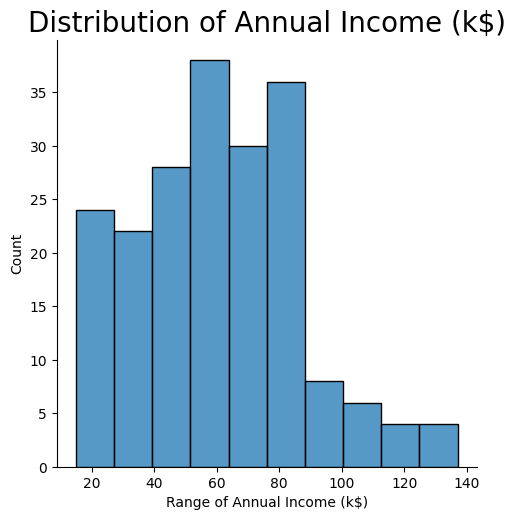

In [3]:
plt.figure(figsize=(10, 6))
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5392\4073707593.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

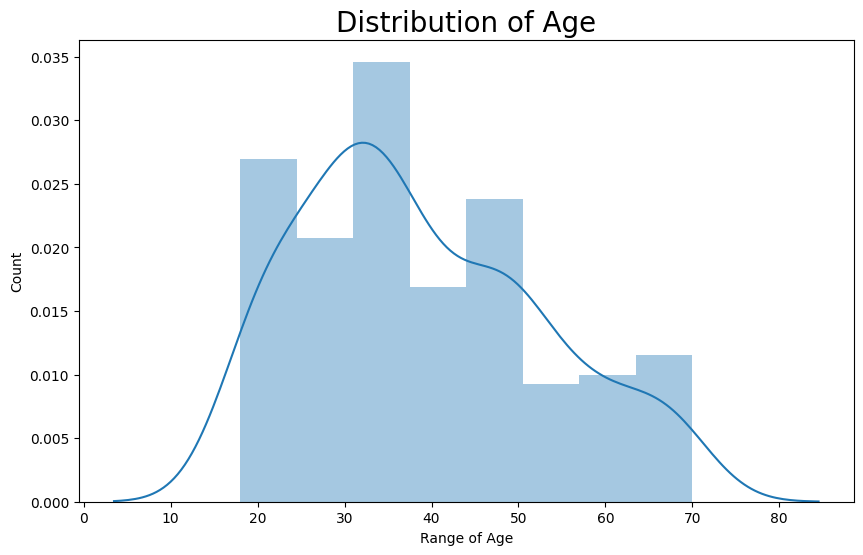

In [4]:
# Dsitribution of Age
plt.figure(figsize=(10,6))
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5392\483651330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

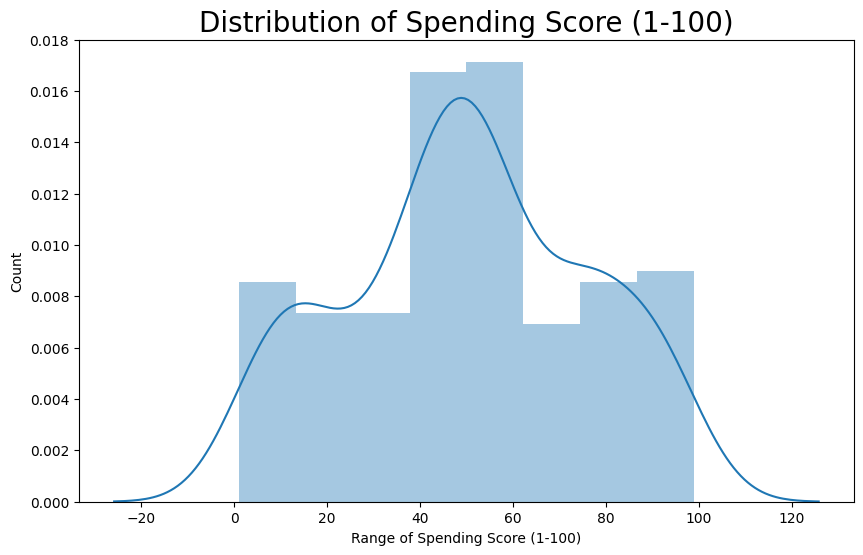

In [5]:
# Distribution of spending score
plt.figure(figsize=(10,6))
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

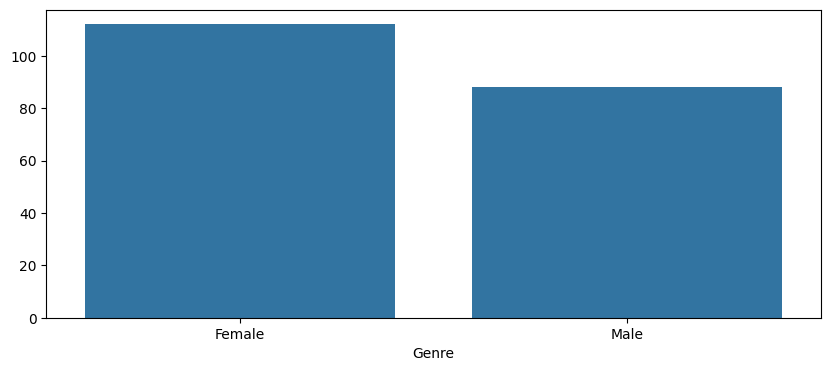

In [7]:
# Gender analysis
genders = data.Genre.value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [8]:
# Take the annual income and spending score
df1 = data[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


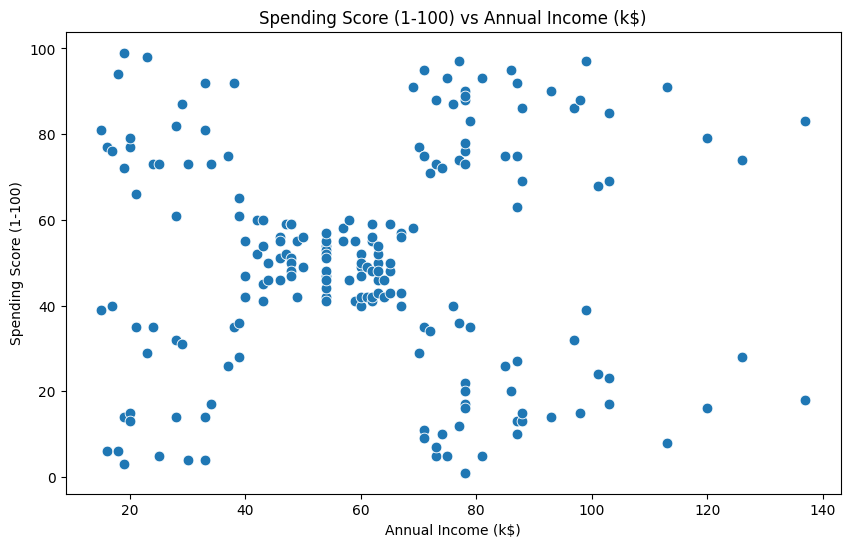

In [9]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = X,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

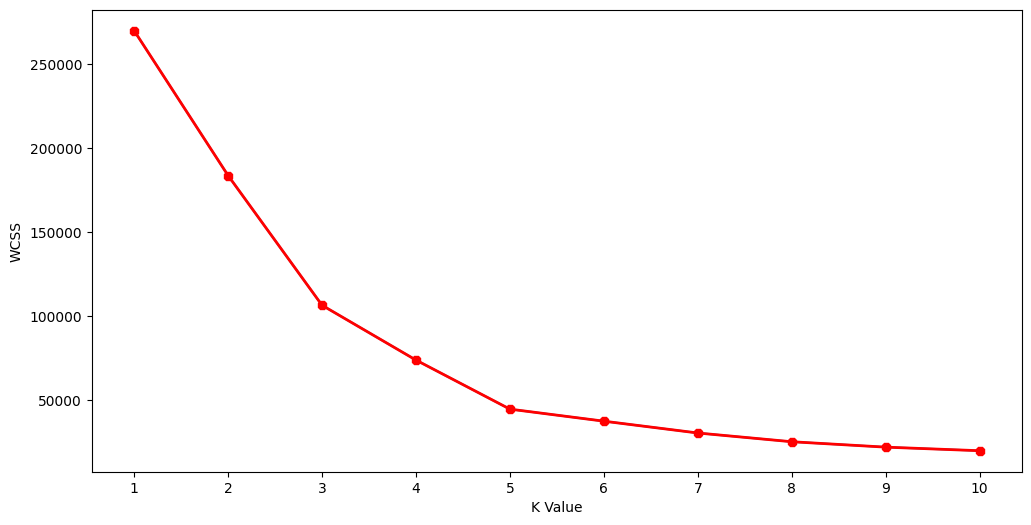

In [12]:
# Importing Kmeans clustering

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

# Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range (1, 11), wcss)
plt.plot(range (1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [13]:
km1 = KMeans(n_clusters=5)
km1.fit(X)

y = km1.predict(X)

df1["label"] = y
df1.head()

c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


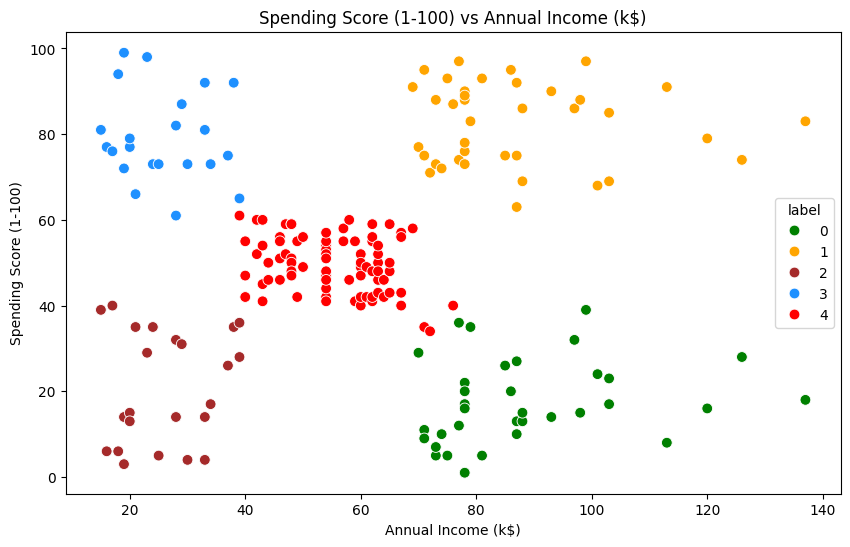

In [14]:
# Scatterplot of clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "label", 
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'], legend='full', data=df1, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show() 

c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

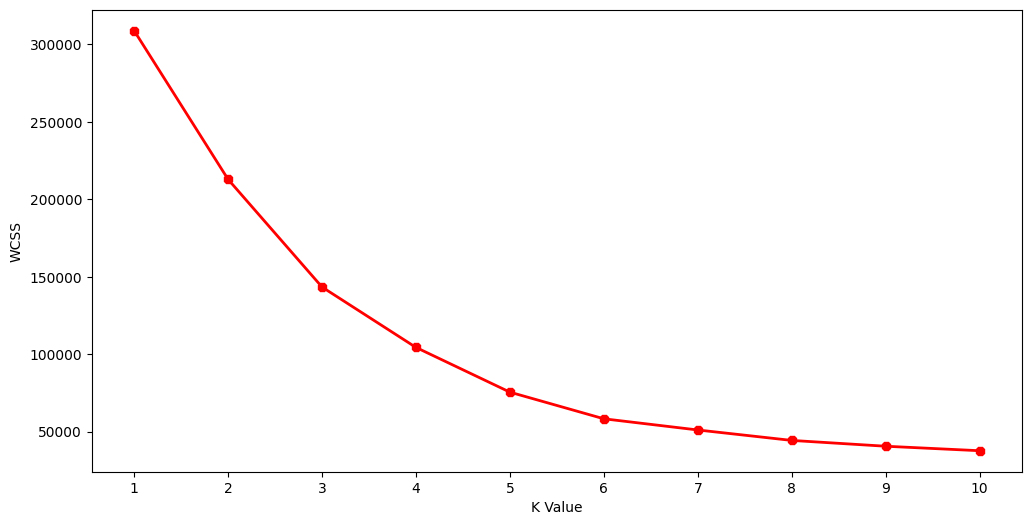

In [15]:
# Taking the features
X2=df1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.

wcss = []

for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range (1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [16]:
km2 = KMeans(n_clusters=5)
v2 = km.fit_predict(X2)
X2.head()

c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


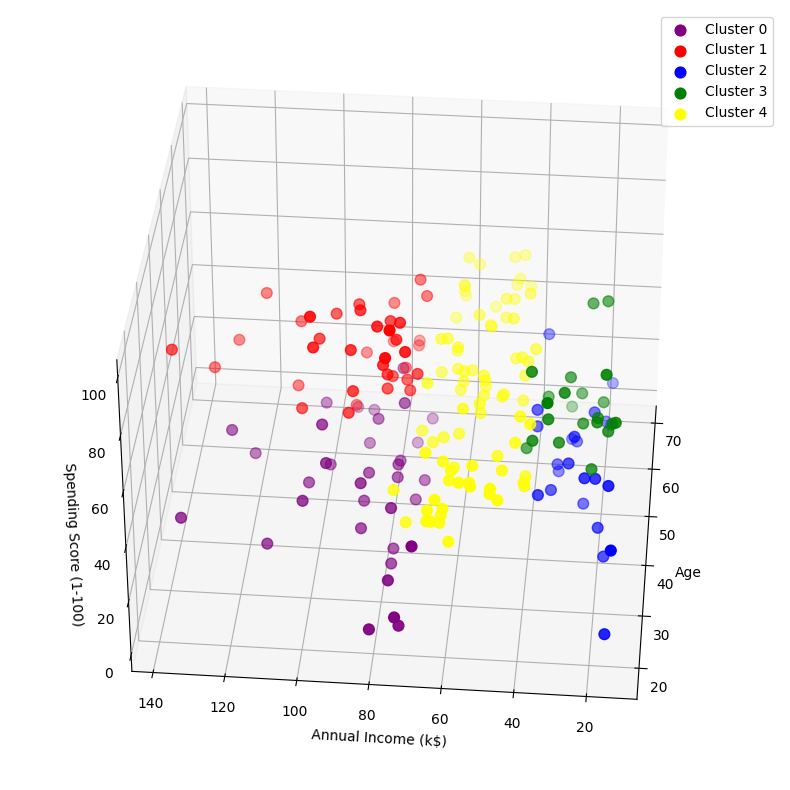

In [17]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60, label="Cluster 0")
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60, label="Cluster 1")
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60, label="Cluster 2")
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60, label="Cluster 3")
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60, label="Cluster 4")

# Set the view angle
ax.view_init(35, 185)

# Set axis labels
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

# Show plot with legend
plt.legend()
plt.show()

In [18]:
cust1 = df1[df1["label"] == 1]
print('Number of customers in 1st group:', len(cust1))
print('They are:', cust1["CustomerID"].values)

print("\n")

cust2 = df1[df1["label"] == 2]
print('Number of customers in 2nd group:', len(cust2))
print('They are:', cust2["CustomerID"].values)

print("\n")

cust3 = df1[df1["label"] == 0]
print('Number of customers in 3rd group:', len(cust3))
print('They are:', cust3["CustomerID"].values) 

print("\n")

cust4 = df1[df1["label"] == 3]
print('Number of customers in 4th group:', len(cust4))
print('They are:', cust4["CustomerID"].values) 

print("\n")

Number of customers in 1st group: 39
They are: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


Number of customers in 2nd group: 23
They are: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


Number of customers in 3rd group: 35
They are: [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


Number of customers in 4th group: 22
They are: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


